In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [3]:

with open('100-1-positive.json') as f:
    pos = json.load(f)

with open('100-0-negative.json') as f:
    neg = json.load(f)

In [4]:
neg['feature_stats'].keys()

dict_keys(['max', 'frac_nonzero', 'skew', 'kurtosis', 'quantile_data', 'quantiles', 'ranges_and_precisions'])

[64 34 59  6 45 43 55 70 21 38]
[0.0355072  0.00795364 0.00409698 0.00571442 0.00492477 0.00452805
 0.00434494 0.00254059 0.00450897 0.00712204]
[0.01712799 0.00279999 0.00184631 0.00183868 0.0015831  0.00133896
 0.00112534 0.00112534 0.00111771 0.00076675]


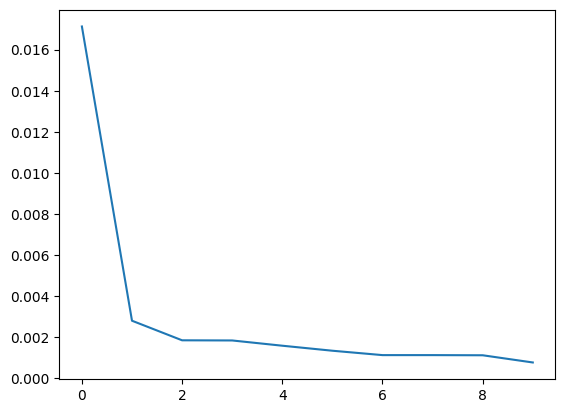

In [46]:
pos_frac = np.array(pos['feature_stats']['frac_nonzero'])
neg_frac = np.array(neg['feature_stats']['frac_nonzero'])
delta = pos_frac - neg_frac

top_10 = np.argsort(delta)[::-1][:10]

print(top_10)
print(pos_frac[top_10])
print(delta[top_10])

plt.plot(delta[top_10])

In [8]:
from transformers import GPT2Tokenizer

tok = GPT2Tokenizer.from_pretrained('gpt2')


/root/mteb-sae/v/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [45]:
for i in range(20):
    top_activations = pos['feature_data_dict']['23']['sequence_data']['seq_group_data'][0]['seq_data'][i]

    token_ids = top_activations['token_ids']
    feat_acts = top_activations['feat_acts']

# print(tok.decode(token_ids))
    # print(token_ids)
    q = tok.decode(token_ids)
    w = tok.convert_ids_to_tokens(token_ids)

    wanted = []
    for i, t in enumerate(w):
        if feat_acts[i] > 0.0:
            cleaned_token = t.replace('Ġ', '')
            wanted.append(cleaned_token)
    print(q, wanted, np.max(feat_acts))

 a time capsule of an era when people still believed that ['era', 'when'] 38.2449
 Love is to remember the era from which it came, ['era'] 36.5857
 with rich details of the era's beliefs, superstitions ['era'] 36.4501
 actual stars of the golden era to get you into the ['era'] 34.063
Many stars of the silent era have cameos in " ['era'] 33.7188
os of stars of the era make this a real treat ['era'] 33.5384
 look back at an exciting era in Hollywood's history and ['era', 'in'] 33.2568
 that, or any other era.<br /><br ['era'] 33.0275
 you'd think for this era) and make the non ['era'] 30.203
 biggest stars of the silent era. The movie captured my ['era'] 29.8678
, far into the CGI era.<br /><br ['era'] 29.8161
 famous crime authors of that era. Needless to state that ['era'] 29.7781
 stereotypical movie star of that era, she kept repressing ['era'] 29.1688
 you, no matter what era it is set in, ['era'] 28.6808
 finest films of the silent era were being made in every ['era'] 27.9661
 for 

Words with high feature activations: ['newly', 'widowed']


In [ ]:
model_name = 'gpt2'
sae_release = 'gpt2-small-res-jb'
sae_id = 'blocks.8.hook_resid_pre'
max_seq_len = 256
device = 'cpu'

model = SAEEncoder(transformer_name=model_name, max_seq_len=max_seq_len, sae_release=sae_release, sae_id=sae_id, device=device)


In [ ]:
sentences = ['give me some information about religion', 'I really really love dogs', 'I really really love jesus', "and for 30 days and 30 nights jesus wandered the desert"]

In [ ]:
embeddings = model.encode(sentences)

In [ ]:
cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6)

In [ ]:
embeddings.shape

In [ ]:
# normalize each embedding 

embeddings = embeddings / torch.norm(embeddings, dim=1, keepdim=True)

In [ ]:
# count number of zeros in each embedding

num_zeros = torch.sum(embeddings == 0, dim=1)

In [ ]:
# print the indices of the non-zero values for each embedding 


# for i in range(embeddings.shape[0]):
#     print(i, torch.nonzero(embeddings[i]))

# print the indices shared between all 3 embeddings

shared = torch.nonzero(embeddings[0] * embeddings[1] * embeddings[2])
print(len(shared))


shared = torch.nonzero(embeddings[0] * embeddings[1])
print('0 and 1', len(shared))

shared = torch.nonzero(embeddings[0] * embeddings[2])
print('0 and 2', len(shared))

shared = torch.nonzero(embeddings[1] * embeddings[2])
print('1 and 2', len(shared))
    

In [ ]:
# print the indices of the non-zero values for each embedding 


# for i in range(embeddings.shape[0]):
#     print(i, torch.nonzero(embeddings[i]))

# print the indices shared between all 3 embeddings

shared = torch.nonzero(embeddings[0] * embeddings[1] * embeddings[2])
print(len(shared))


shared = torch.nonzero(embeddings[0] * embeddings[1])
print('0 and 1', len(shared))

shared = torch.nonzero(embeddings[0] * embeddings[2])
print('0 and 2', len(shared))

shared = torch.nonzero(embeddings[1] * embeddings[2])
print('1 and 2', len(shared))
    

In [ ]:
cos(embeddings[0], embeddings[1])

In [ ]:
# calculate cosine difference between embeddings

cos(embeddings[1], embeddings[2])



In [ ]:
cos(embeddings[0], embeddings[2])
